In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

/tmp/ipykernel_643519/1035302106.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


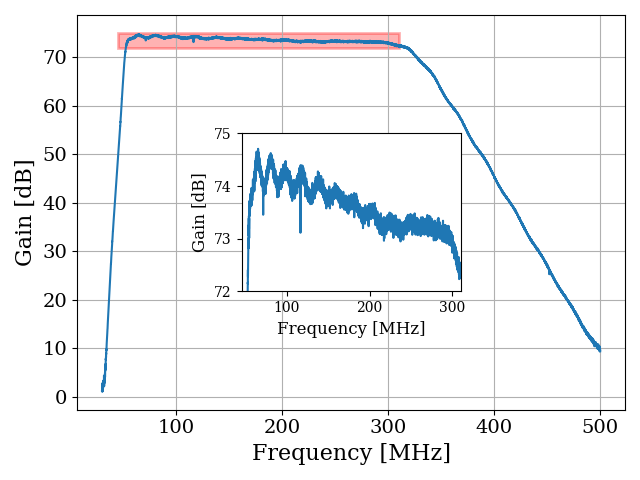

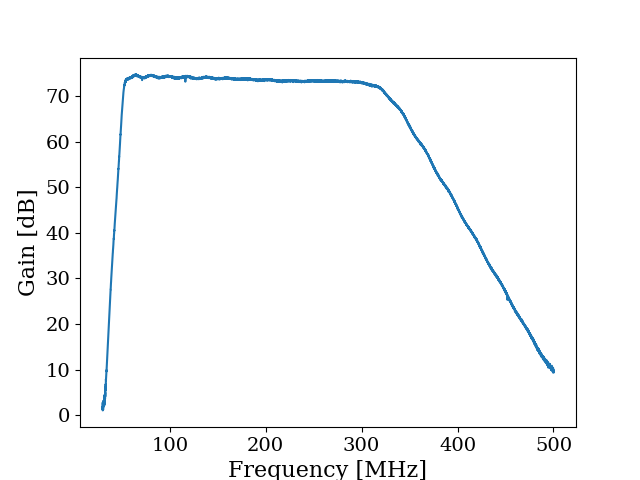

In [4]:
#see lab book p18 for details
freqs       = np.load('./data/calibration_5_8_23.npy')[:,0]
calibration = np.load('./data/calibration_5_8_23.npy')[:,1]

filename    = '1012E_amp11p16V_psu_12p93V_zklA_rfPreOff_5_8_23.npy'

data        = np.load('./data/' + filename)[:,1]
dataCal     = data - calibration

plt.close('all')
plt.figure()
plt.plot(freqs/1e6, dataCal)
#plt.title('Run 1.4 Full Amp/Filter Chain Gain')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Gain [dB]')

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot
fig, ax = plt.subplots()
ax.plot(freqs / 1e6, dataCal)
ax.set_xlabel('Frequency [MHz]')
ax.set_ylabel('Gain [dB]')
ax.grid()
# Inset plot
ax_inset = inset_axes(ax, width="40%", height="40%", loc='center')  # Adjust size and location
ax_inset.plot(freqs / 1e6, dataCal)
ax_inset.set_xlim(45, 310)
ax_inset.set_ylim(72, 75)
ax_inset.set_xlabel('Frequency [MHz]', fontsize=12)
ax_inset.set_ylabel('Gain [dB]', fontsize=12)
ax_inset.tick_params(axis='both', which='major', labelsize=10)
# Add a red box around the zoomed-in region
# Add a red box around the zoomed-in region
rect = plt.Rectangle((45, 72), 265, 3, edgecolor='red', facecolor='red', alpha=0.3, linewidth=2)
rect.set_edgecolor((1, 0, 0, 1))  # Set edge color with higher alpha
ax.add_patch(rect)


plt.tight_layout()
plt.show()


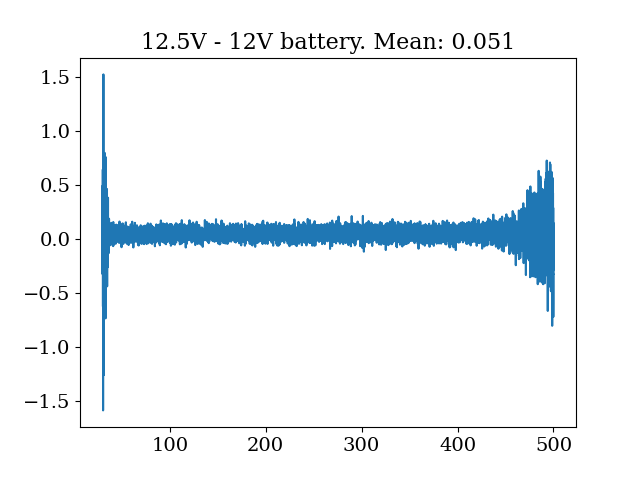

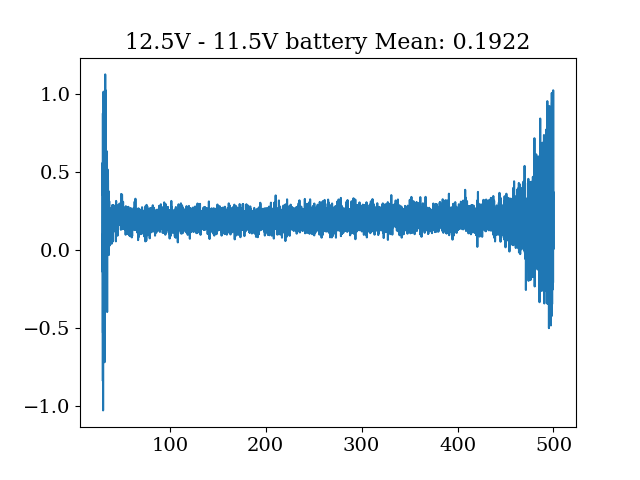

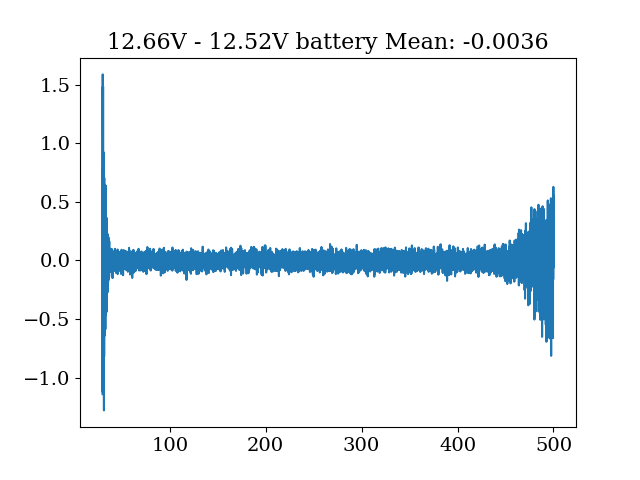

In [5]:
%matplotlib widget
plt.close('all')

filename    = '1012E_amp9p46V_psu_11p48V_zklA_rfPreOff_5_8_23.npy'
batt11p48V  = np.load('./data/' + filename)[:,1]

filename    = '1012E_amp9p78V_psu_11p95V_zklA_rfPreOff_5_8_23.npy'
batt11p95V  = np.load('./data/' + filename)[:,1]

filename    = '1012E_amp10p25V_psu_12p52V_zklA_rfPreOff_5_8_23.npy'
batt12p52V   = np.load('./data/' + filename)[:,1]

filename    = '1012E_amp10p42V_psu_12p66V_zklA_rfPreOff_5_8_23.npy'
batt12p66V   = np.load('./data/' + filename)[:,1]

plt.figure()
plt.title(f'12.5V - 12V battery. Mean: {round(np.mean((batt12p52V - batt11p95V)[600:5500]),4)}')
plt.plot(freqs/1e6, batt12p52V - batt11p95V )


plt.figure()
plt.title(f'12.5V - 11.5V battery Mean: {round(np.mean((batt12p52V - batt11p48V)[600:5500]),4)}')
plt.plot(freqs/1e6, batt12p52V - batt11p48V )


plt.figure()
plt.title(f'12.66V - 12.52V battery Mean: {round(np.mean((batt12p66V - batt12p52V)[600:5500]),4)}')
plt.plot(freqs/1e6, batt12p66V - batt12p52V )



Text(0, 0.5, 'Average Gain, with Track Gen (dBm)')

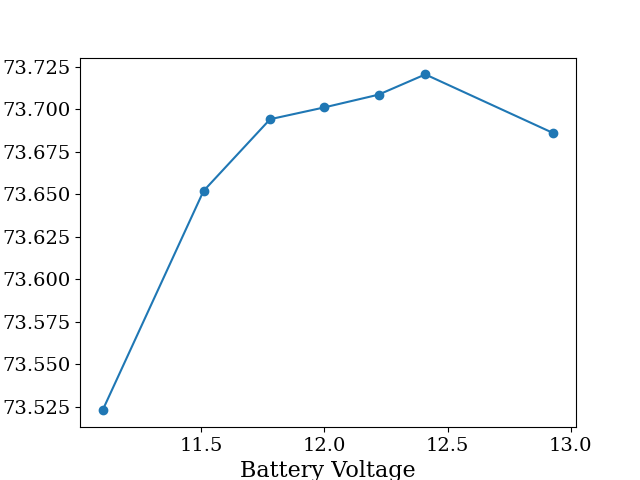

In [6]:
#after modifying the driver board to increase amp voltage by about half a volt

psu11p10V   = np.load('./data/' + '1012E_amp9p50V_psu_11p10V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu11p51V   = np.load('./data/' + '1012E_amp9p83V_psu_11p51V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu11p78V   = np.load('./data/' + '1012E_amp10p06V_psu_11p78V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p00V   = np.load('./data/' + '1012E_amp10p27V_psu_12p00V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p22V   = np.load('./data/' + '1012E_amp10p49V_psu_12p22V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p41V   = np.load('./data/' + '1012E_amp10p67V_psu_12p41V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p93V   = np.load('./data/' + '1012E_amp11p16V_psu_12p93V_zklA_rfPreOff_5_8_23.npy')[:,1]


dataList    = [psu11p10V,
    psu11p51V,
    psu11p78V,
    psu12p00V,
    psu12p22V,
    psu12p41V,
    psu12p93V]
vList       = [11.10,
    11.51,
    11.78,
    12.00,
    12.22,
    12.41,
    12.93]

vAmpList    = [9.5,
    9.83,
    10.06,
    10.27,
    10.49,
    10.67,
    11.16]

meanList    = []
for v, arr in zip(vList, dataList):
    meanList.append(np.mean((arr-calibration)[600:5500]))

plt.close('all')
plt.figure()
plt.plot(vList, meanList)
plt.scatter(vList, meanList)
plt.xlabel('Battery Voltage')
plt.ylabel('Average Gain, with Track Gen (dBm)')

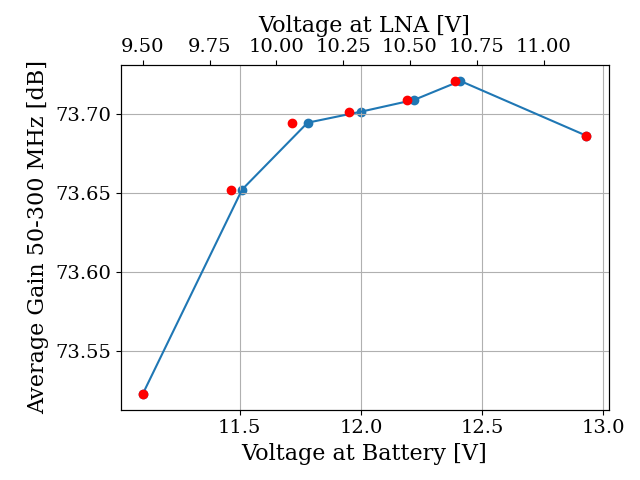

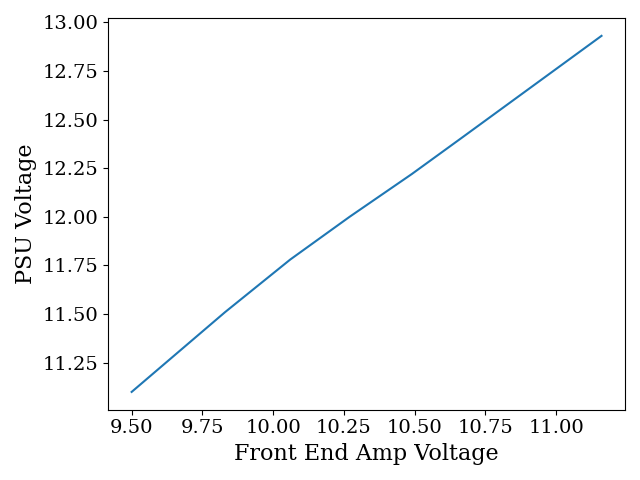

In [7]:
plt.close('all')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#plt.title('Gain of Run 1.4 Amp Chain vs Voltage (.068F 8Ohm Slow-Turn on Circuit)')

ax1.plot(vList, meanList)
ax1.scatter(vList, meanList)
ax1.set_xlabel('Voltage at Battery [V]', color = 'k')

ax2.scatter(vAmpList, meanList, color = 'r')
ax2.set_xlabel('Voltage at LNA [V]', color = 'k')


ax1.set_ylabel('Average Gain 50-300 MHz [dB]')
ax1.grid()
fig.tight_layout()


plt.figure()
plt.plot(vAmpList,vList)
plt.xlabel('Front End Amp Voltage')
plt.ylabel('PSU Voltage')
plt.tight_layout()